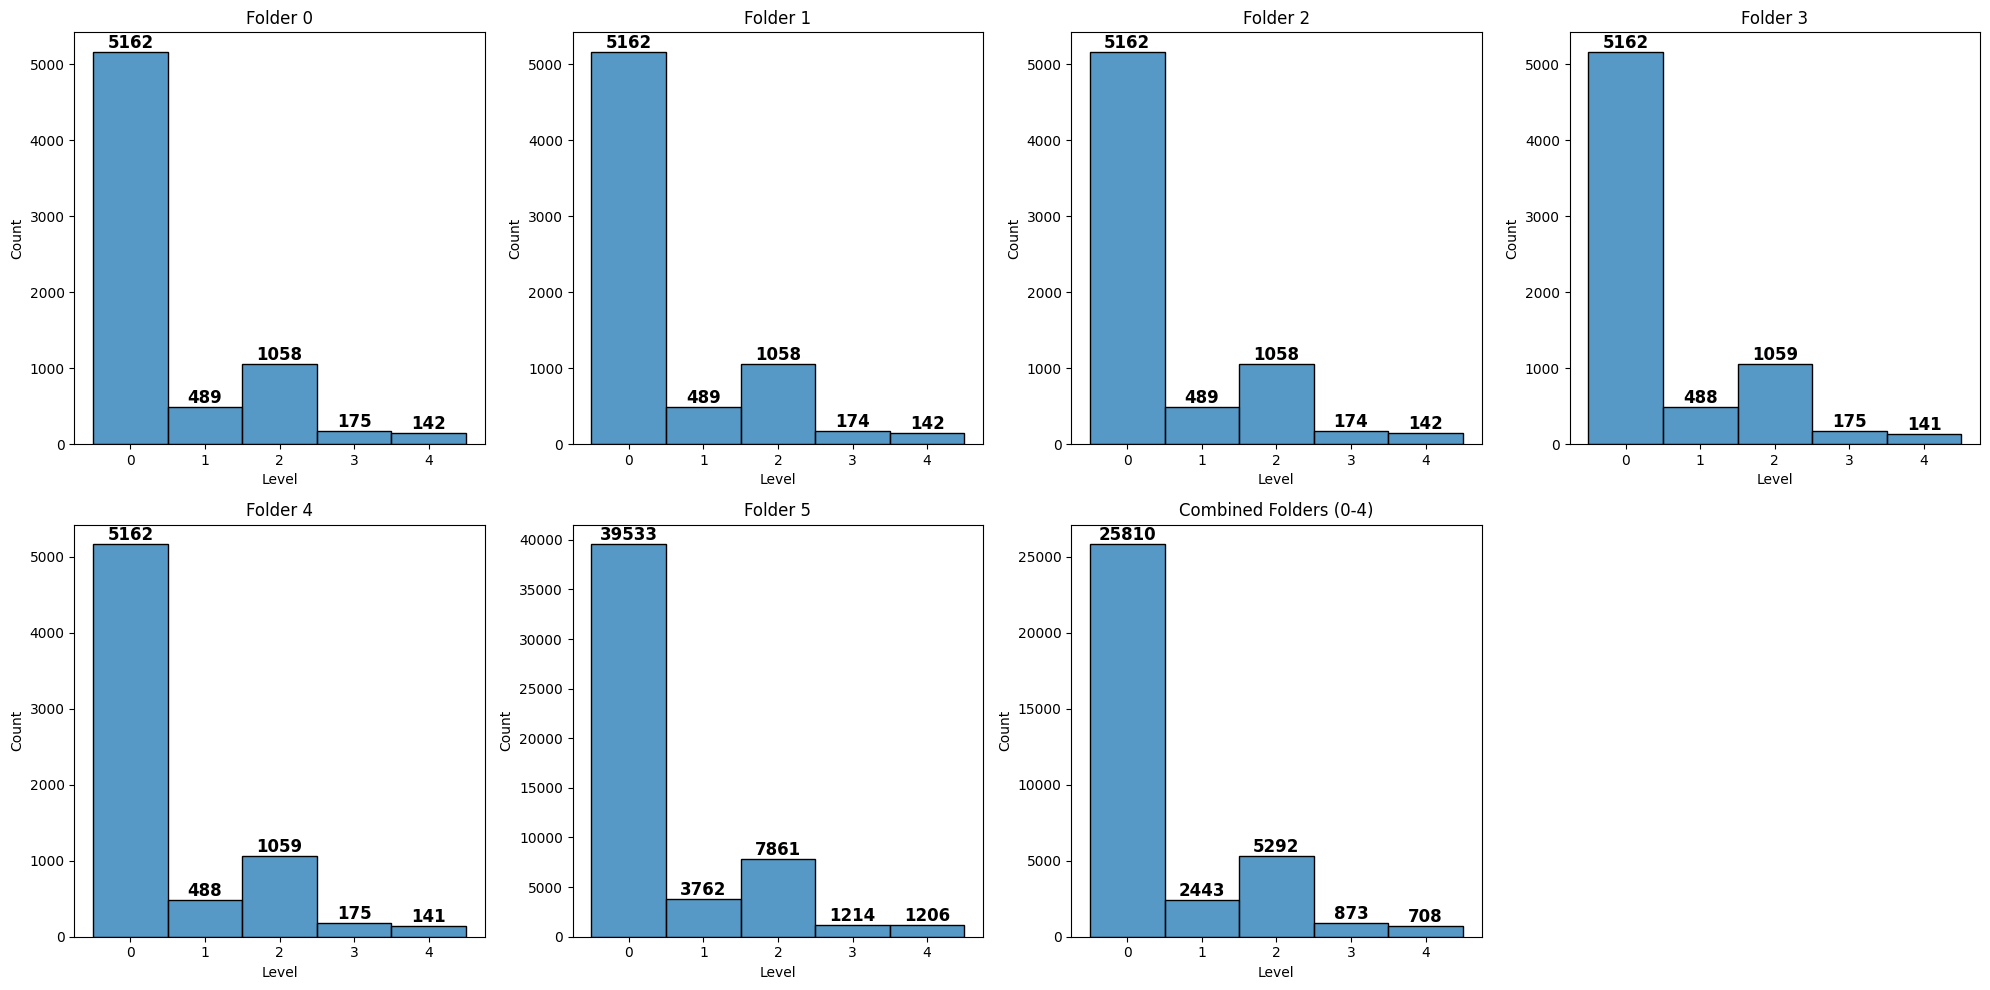

In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Load JSON data
with open("../facebase/benchmarks/databases/DR.json", "r") as f:
    data = json.load(f)


# Convert to a DataFrame
df = pd.DataFrame(data)

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()

# Function to add value labels on bars
def add_labels(ax):
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            ax.text(patch.get_x() + patch.get_width() / 2, height, int(height), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# Plot histograms for each folder (0 to 5)
for folder_num in range(6):
    ax = axes[folder_num]
    sns.histplot(df[df["folder"] == folder_num]["level"], bins=np.arange(-0.5, 5.5, 1), ax=ax, kde=False)
    ax.set_title(f"Folder {folder_num}")
    ax.set_xlabel("Level")
    ax.set_ylabel("Count")
    ax.set_xticks(range(5))
    add_labels(ax)  # Add count labels on bars

# Plot combined histogram for folders 0 to 4
ax = axes[6]
df_filtered = df[df["folder"].isin(range(5))]
sns.histplot(df_filtered["level"], bins=np.arange(-0.5, 5.5, 1), ax=ax, kde=False)
ax.set_title("Combined Folders (0-4)")
ax.set_xlabel("Level")
ax.set_ylabel("Count")
ax.set_xticks(range(5))
add_labels(ax)  # Add count labels

# Hide the last empty subplot
axes[7].set_visible(False)

plt.tight_layout()
plt.show()